##kütüphanelerin ve analiz yapılacak paranın yükleme işlemi yapılıyor.

In [27]:
!pip install yfinance
!pip install prophet
import yfinance as yf
veeri= yf.download('BTC-USD',start="2020-01-01")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[*********************100%***********************]  1 of 1 completed


In [28]:
veeri

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095
...,...,...,...,...,...,...
2022-08-13,24402.187500,24860.050781,24346.115234,24424.068359,24424.068359,22987346289
2022-08-14,24429.056641,24974.914062,24206.259766,24319.333984,24319.333984,22994133555
2022-08-15,24318.316406,25135.589844,23839.775391,24136.972656,24136.972656,35123501685


In [29]:
veeri= veeri.reset_index()



In [30]:
#x ve y sutunlarini belirle

data = veeri.reset_index()[['Date','Adj Close']]
data.columns= ['ds','y']

##projemizin eğitim aşamasındayız.

In [31]:
from prophet import Prophet
model=Prophet()
model.fit(data)
gelecek=model.make_future_dataframe(365)
tahmin=model.predict(gelecek)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7_97b5nf/mg07zby7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7_97b5nf/nvpz2xt9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39010', 'data', 'file=/tmp/tmp7_97b5nf/mg07zby7.json', 'init=/tmp/tmp7_97b5nf/nvpz2xt9.json', 'output', 'file=/tmp/tmpa3yf6065/prophet_model-20220817175348.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:53:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:53:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [25]:
tahmin

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-01,9468.139625,7247.535518,13952.384724,9468.139625,9468.139625,1024.214005,1024.214005,1024.214005,82.578746,82.578746,82.578746,941.635259,941.635259,941.635259,0.0,0.0,0.0,10492.353630
1,2020-01-02,9423.101790,6863.066343,14068.990044,9423.101790,9423.101790,1042.159773,1042.159773,1042.159773,-40.353004,-40.353004,-40.353004,1082.512777,1082.512777,1082.512777,0.0,0.0,0.0,10465.261563
2,2020-01-03,9378.063955,7354.919050,14144.287749,9378.063955,9378.063955,1153.569029,1153.569029,1153.569029,-29.300377,-29.300377,-29.300377,1182.869406,1182.869406,1182.869406,0.0,0.0,0.0,10531.632983
3,2020-01-04,9333.026119,6856.911055,14141.637352,9333.026119,9333.026119,1230.643797,1230.643797,1230.643797,-8.798588,-8.798588,-8.798588,1239.442385,1239.442385,1239.442385,0.0,0.0,0.0,10563.669916
4,2020-01-05,9287.988284,6998.798411,14221.956004,9287.988284,9287.988284,1240.258602,1240.258602,1240.258602,-9.727207,-9.727207,-9.727207,1249.985809,1249.985809,1249.985809,0.0,0.0,0.0,10528.246886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1320,2023-08-13,-10071.533296,-85243.460944,60339.827568,-83211.795522,59363.275054,-401.430805,-401.430805,-401.430805,-9.727207,-9.727207,-9.727207,-391.703598,-391.703598,-391.703598,0.0,0.0,0.0,-10472.964100
1321,2023-08-14,-10166.791642,-86036.803487,58999.498889,-83631.448307,59546.315479,-178.771352,-178.771352,-178.771352,10.551284,10.551284,10.551284,-189.322636,-189.322636,-189.322636,0.0,0.0,0.0,-10345.562995
1322,2023-08-15,-10262.049989,-82902.785521,59672.158937,-84045.430932,59729.355904,-2.011269,-2.011269,-2.011269,-4.950853,-4.950853,-4.950853,2.939584,2.939584,2.939584,0.0,0.0,0.0,-10264.061259
1323,2023-08-16,-10357.308336,-83641.181294,61742.142399,-84459.413557,59934.610596,266.361290,266.361290,266.361290,82.578746,82.578746,82.578746,183.782543,183.782543,183.782543,0.0,0.0,0.0,-10090.947047


##veri görselleştirme

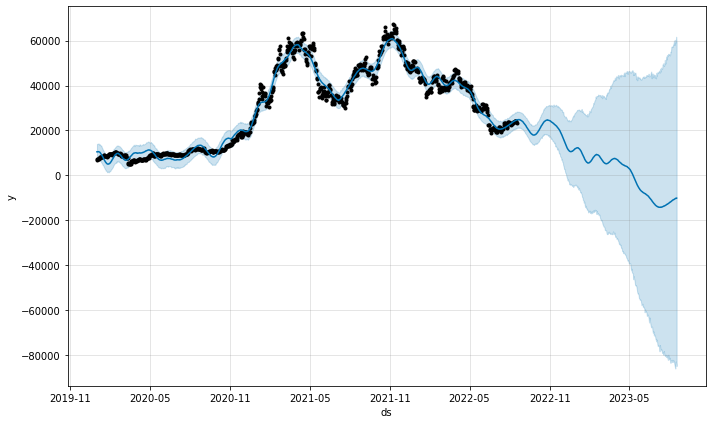

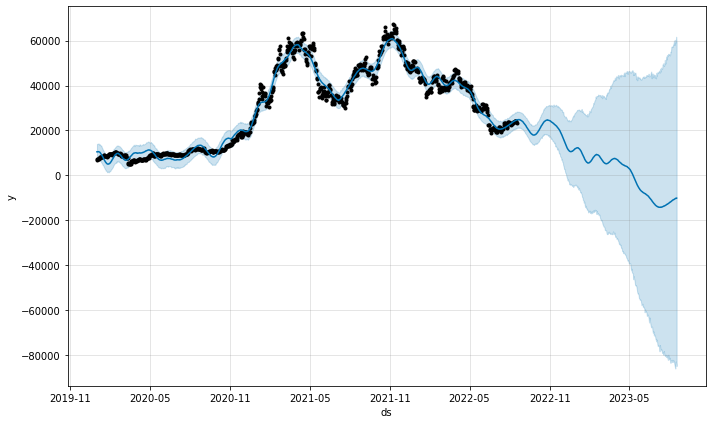

In [26]:
model.plot(tahmin)